<a href="https://colab.research.google.com/github/SimranTrivedi/Predictive_Maintenance_ML/blob/main/Predictive_maintainence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("ai4i2020.csv")

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [6]:
#descriptive analysis
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>,
        <Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>],
       [<Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

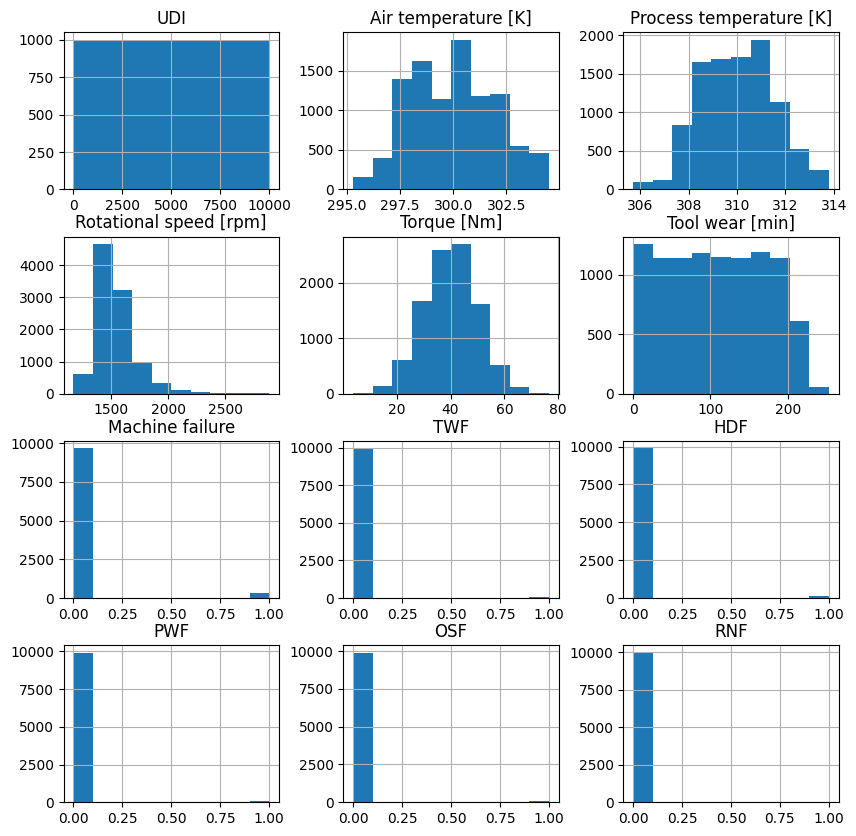

In [7]:
df.hist(figsize=((10,10)))

In [8]:
#class distribution
df['Machine failure'].unique()

array([0, 1])

In [9]:
df['Machine failure'].value_counts()

,count
Machine failure,
0,9661
1,339


<Axes: xlabel='Machine failure', ylabel='count'>

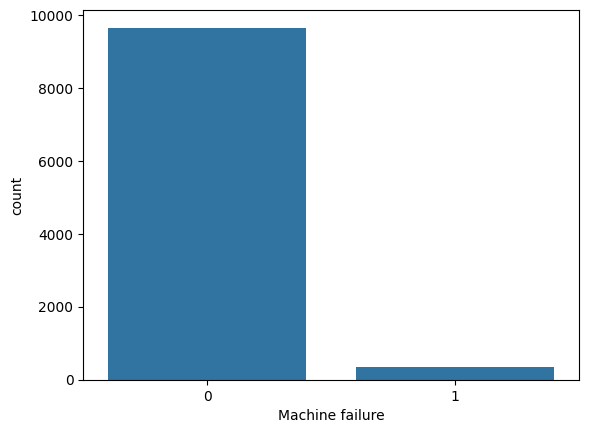

In [10]:
sns.countplot(x="Machine failure",data=df)

In [11]:
#type of failure
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [12]:
#get a function to get the types of failures, TWF,HDF, etc
failure_columns=['TWF', 'HDF', 'PWF', 'OSF',
       'RNF']
def classify_failure_type(row):
  for col in  failure_columns:
    if row[col]==1:
      return col
  return "no failure"



In [13]:
df['failure type']= df.apply(classify_failure_type,axis=1)

In [14]:
df['failure type']

,failure type
0,no failure
1,no failure
2,no failure
3,no failure
4,no failure
...,...
9995,no failure
9996,no failure
9997,no failure
9998,no failure


<Axes: xlabel='failure type', ylabel='count'>

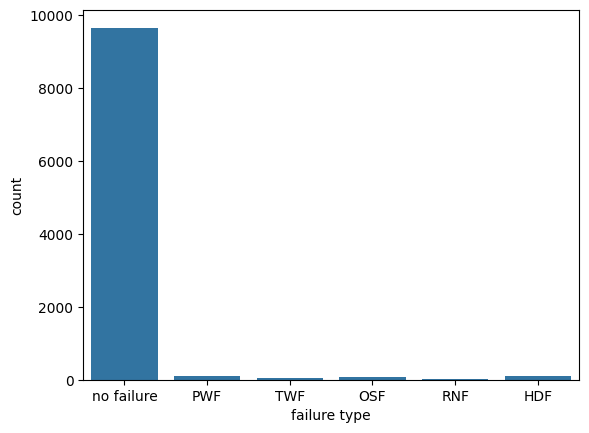

In [15]:
sns.countplot(x="failure type",data=df)

<Axes: xlabel='Type', ylabel='count'>

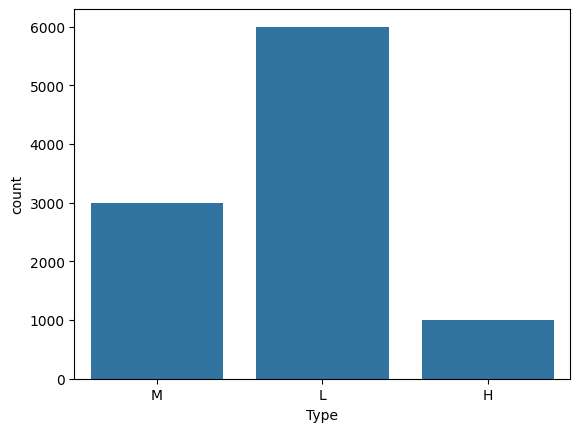

In [16]:
sns.countplot(x="Type",data=df)

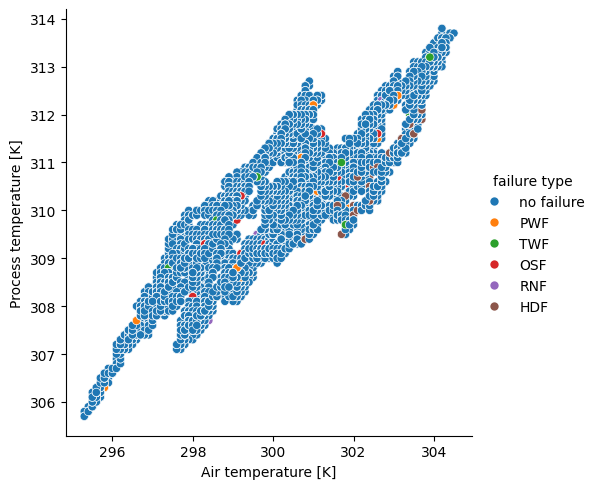

In [17]:
sns.relplot(x="Air temperature [K]",y="Process temperature [K]",hue="failure type",sizes=(100,5),data=df)

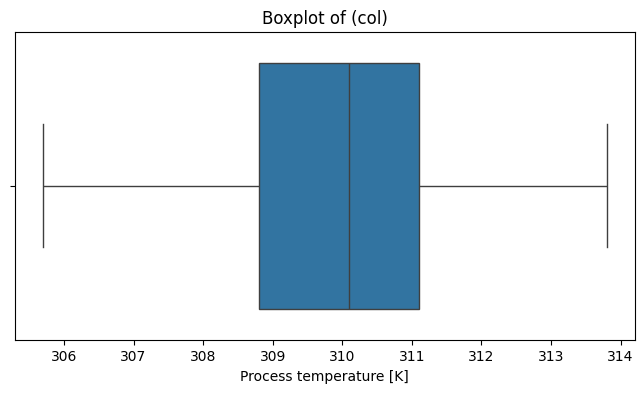

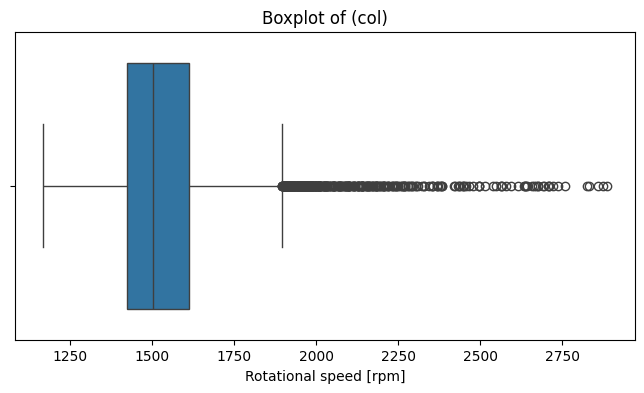

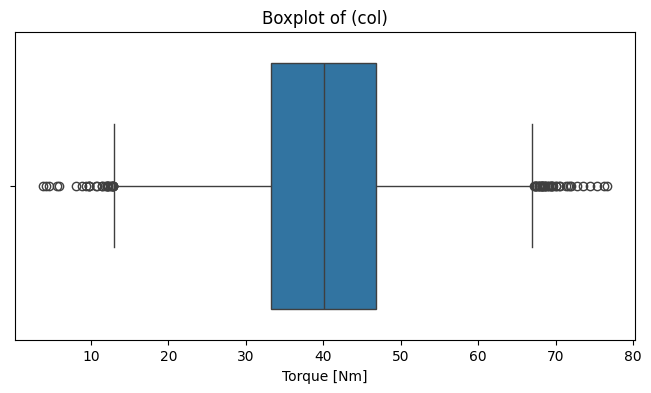

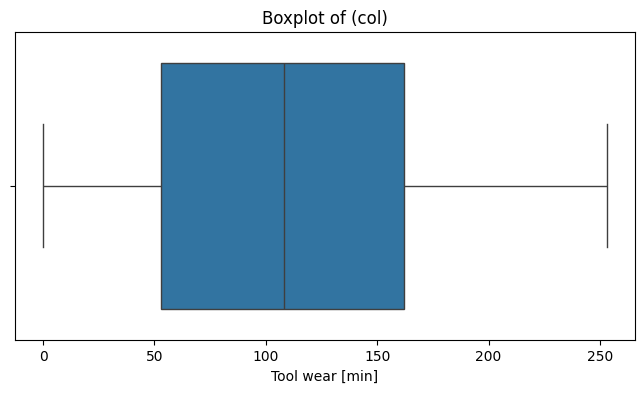

In [18]:
#outlier detection
sensor_columns=['Process temperature [K]', 'Rotational speed [rpm]',
       'Torque [Nm]', 'Tool wear [min]']
for col in sensor_columns:
  plt.figure(figsize=(8,4))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of (col)')
  plt.show()


In [19]:
#torque and rotation has more outliers outside normal range


In [20]:
#feature engineering

In [21]:
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'failure type'],
      dtype='object')

In [22]:
df["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [23]:
df["Type"]=df["Type"].map({"L":0,"M":1,"H":2})

In [24]:
feature_cols=['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
Xfeatures=df[feature_cols]
ylabels=df["Machine failure"]

In [25]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [26]:
X_train,X_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

In [27]:
#model
def build_model(classifier,X_train,y_train,X_test,y_test):
  classifier.fit(X_train,y_train)
  return classifier


In [28]:
df=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf=build_model(df,X_train,y_train,X_test,y_test)

In [29]:
#accuracy
rf_clf.score(X_test,y_test)

0.9845

In [30]:
y_pred=rf_clf.predict(X_test)

In [31]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.59      0.70        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



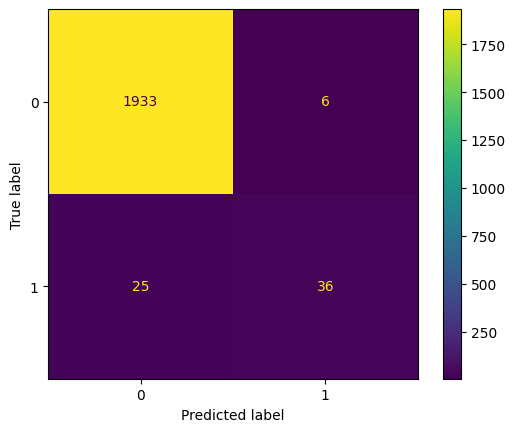

In [32]:
cn=confusion_matrix(y_test,y_pred,labels=rf_clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cn,display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [33]:
#logistic regression
lr=LogisticRegression()
lr_clf=build_model(lr,X_train,y_train,X_test,y_test)

In [34]:
sample_data=X_test.iloc[20]
print("LR prediction",lr_clf.predict([sample_data]))
print("RF prediction",rf_clf.predict([sample_data]))

LR prediction [0]
RF prediction [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
## model interpretation
!pip install eli5
import eli5

In [36]:
#show the most important features
eli5.show_weights(lr_clf, feature_names=feature_cols)

Weight?,Feature
+0.847,Air temperature [K]
+0.280,Torque [Nm]
+0.013,Tool wear [min]
+0.012,Rotational speed [rpm]
-0.010,<BIAS>
-0.308,Type
-0.932,Process temperature [K]


In [37]:
#model agnostic
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(rf_clf,random_state=42)
perm.fit(X_test,y_test)
eli5.show_weights(perm,feature_names=feature_cols)

Weight,Feature
0.0292 ± 0.0027,Torque [Nm]
0.0216 ± 0.0042,Air temperature [K]
0.0156 ± 0.0041,Rotational speed [rpm]
0.0114 ± 0.0034,Process temperature [K]
0.0102 ± 0.0040,Tool wear [min]
0.0011 ± 0.0010,Type


In [38]:
#explain single prediction
eli5.show_prediction(rf_clf,sample_data,feature_names=feature_cols)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U